In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Import libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_squared_error

%matplotlib inline 

In [3]:
train_df = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\house-prices-advanced-regression-techniques\train.csv")
test_df = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\house-prices-advanced-regression-techniques\test.csv")
sample_submission = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\house-prices-advanced-regression-techniques\sample_submission.csv")

In [4]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [5]:
train_df.columns.difference(test_df.columns)

Index(['SalePrice'], dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
corr = train_df.select_dtypes(include = np.number).corr()['SalePrice']
corr

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [9]:
list(corr[corr>0.55].index.values)

['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [10]:
columns_select = list(corr[corr>0.55].index.values)

In [11]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
train_df_select = train_df[['Id']+columns_select]
test_df_select = test_df[['Id','OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','GarageCars','GarageArea']]


In [13]:
train_df_select.head()

,Id,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
0,1,7,856,856,1710,2,2,548,208500
1,2,6,1262,1262,1262,2,2,460,181500
2,3,7,920,920,1786,2,2,608,223500
3,4,7,756,961,1717,1,3,642,140000
4,5,8,1145,1145,2198,2,3,836,250000


In [14]:
test_df_select.head()

,Id,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea
0,1461,5,882.0,896,896,1,1.0,730.0
1,1462,6,1329.0,1329,1329,1,1.0,312.0
2,1463,5,928.0,928,1629,2,2.0,482.0
3,1464,6,926.0,926,1604,2,2.0,470.0
4,1465,8,1280.0,1280,1280,2,2.0,506.0


In [15]:
train_df_select.isna().sum()

Id             0
OverallQual    0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [16]:
test_df_select.isna().sum()

Id             0
OverallQual    0
TotalBsmtSF    1
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     1
GarageArea     1
dtype: int64

In [17]:
test_df_select = test_df_select.fillna(0)

In [18]:
def model_fit(model, train_X, train_y, test_X, id_col,filename):
    model.fit(train_X, train_y)
    train_pred = model.predict(train_X)
    print(mean_squared_error(train_y, train_pred, squared=False))
    test_pred = model.predict(test_X)
    sample_submission['Id'] = id_col
    sample_submission['SalePrice'] = np.expm1(test_pred)
    sample_submission.to_csv(filename, index = False)
    return mean_squared_error(train_y, train_pred, squared=False), sample_submission
    
    

In [19]:
train_X = train_df_select.drop(columns=["Id", "SalePrice"])
train_y = train_df_select['SalePrice']
test_X = test_df_select.drop(columns=["Id"])

In [20]:
# Linear Regression

In [21]:
linear_model = LinearRegression()
linear_res = model_fit(linear_model, train_X, train_y, test_X, test_df_select['Id'], "linear_res.csv" )

38745.19190580487


<ipython-input-18-31655f1c1e17>:7: RuntimeWarning: overflow encountered in expm1
  sample_submission['SalePrice'] = np.expm1(test_pred)


In [22]:
# Bench Mark Score = 0.66714

In [23]:
train_X = train_df_select.drop(columns=["Id", "SalePrice"])
train_y = np.log1p(train_df_select['SalePrice'])
test_X = test_df_select.drop(columns=["Id"])

In [24]:
linear_model = LinearRegression()
linear_res = model_fit(linear_model, train_X, train_y, test_X, test_df_select['Id'], "linear_res_with_log.csv" )

0.18016937008467887


In [25]:
# BenchMark Score = 0.17990

In [26]:
#Exploratory Analysis (EDA)

Text(0, 0.5, 'SalePrice')

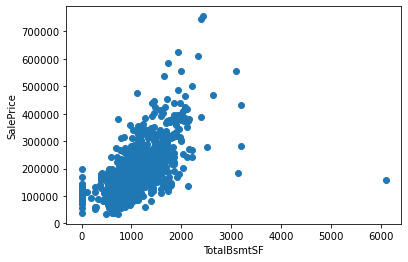

In [27]:
plt.scatter(train_df['TotalBsmtSF'], train_df['SalePrice'])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")


In [28]:
train_df[train_df['TotalBsmtSF']>4000].index

Int64Index([1298], dtype='int64')

In [29]:
train_df = train_df.drop(index = 1298)

In [30]:
train_df = train_df.reset_index().drop(columns='index')

Text(0, 0.5, 'SalePrice')

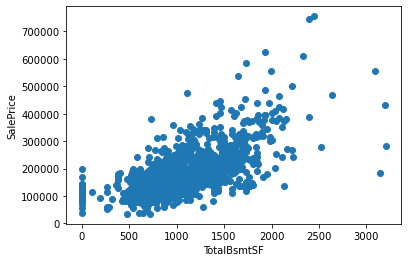

In [31]:
plt.scatter(train_df['TotalBsmtSF'], train_df['SalePrice'])
plt.xlabel("TotalBsmtSF")
plt.ylabel("SalePrice")


In [32]:
def draw_scatter(x,y,xlabel,ylabel):
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

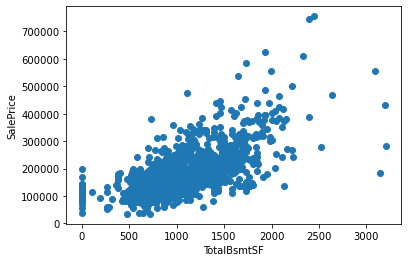

In [33]:
draw_scatter(train_df['TotalBsmtSF'], train_df['SalePrice'],"TotalBsmtSF","SalePrice")

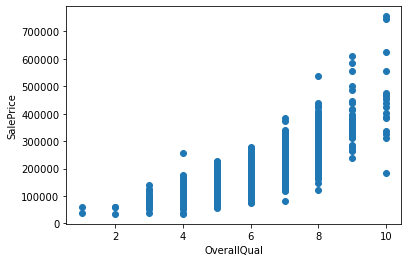

In [34]:
draw_scatter(train_df['OverallQual'], train_df['SalePrice'],"OverallQual","SalePrice")

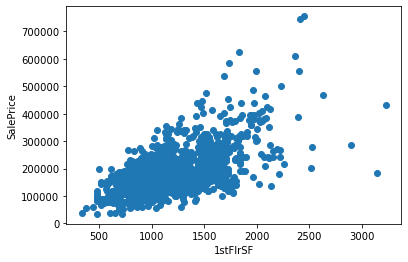

In [35]:
draw_scatter(train_df['1stFlrSF'], train_df['SalePrice'],"1stFlrSF","SalePrice")

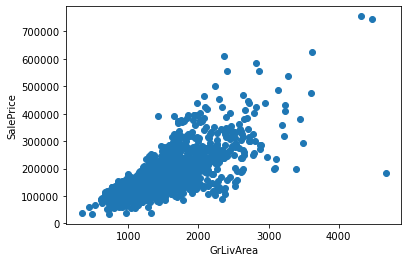

In [36]:
draw_scatter(train_df['GrLivArea'], train_df['SalePrice'],"GrLivArea","SalePrice")
#draw_scatter(train_df['FullBath'], train_df['SalePrice'],"FullBath","SalePrice")
#draw_scatter(train_df['GarageCars'], train_df['SalePrice'],"GarageCars","SalePrice")
#draw_scatter(train_df['GarageArea'], train_df['SalePrice'],"GarageArea","SalePrice")



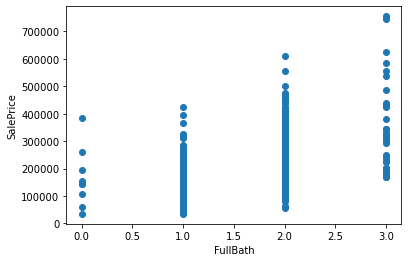

In [37]:
draw_scatter(train_df['FullBath'], train_df['SalePrice'],"FullBath","SalePrice")


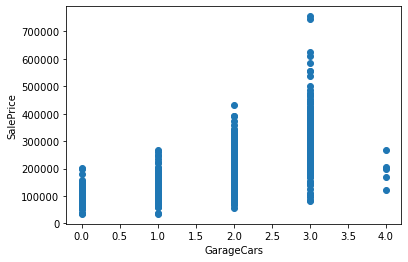

In [38]:
draw_scatter(train_df['GarageCars'], train_df['SalePrice'],"GarageCars","SalePrice")


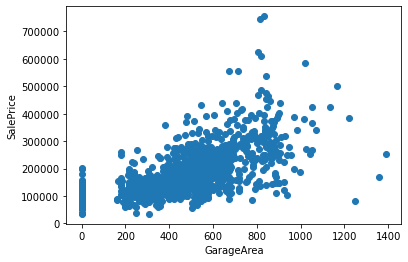

In [39]:
draw_scatter(train_df['GarageArea'], train_df['SalePrice'],"GarageArea","SalePrice")


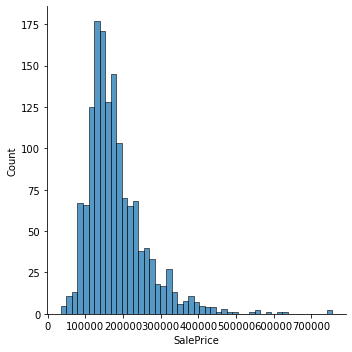

In [40]:
sns.displot(train_df['SalePrice'])

In [41]:
np.log1p(4)

1.6094379124341003

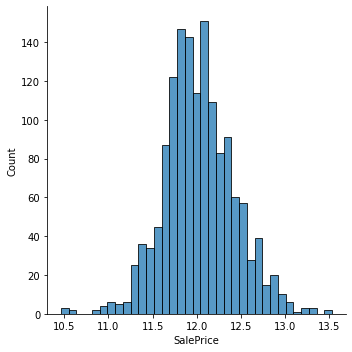

In [42]:
sns.displot(np.log1p(train_df['SalePrice']))

In [43]:
np.expm1(1.6094379124341003)

3.999999999999999

In [44]:
np.expm1(np.log1p(train_df['SalePrice']))

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454    175000.0
1455    210000.0
1456    266500.0
1457    142125.0
1458    147500.0
Name: SalePrice, Length: 1459, dtype: float64

In [45]:
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

In [46]:
full_data = pd.concat([train_df, test_df])

In [47]:
full_data = full_data.reset_index().drop(columns="index")

In [48]:
cat_col = full_data.select_dtypes(exclude = np.number).columns

In [49]:
full_data[cat_col].isna().sum()

MSZoning            4
Street              0
Alley            2720
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2347
MiscFeature      2813
SaleType            1
SaleCondition       0
dtype: int64

In [50]:
for i in cat_col:
    print("We have {} unique values in {} columns: {} ".format(len(full_data[i].unique()), i, full_data[i].unique()))

We have 6 unique values in MSZoning columns: ['RL' 'RM' 'C (all)' 'FV' 'RH' nan] 
We have 2 unique values in Street columns: ['Pave' 'Grvl'] 
We have 3 unique values in Alley columns: [nan 'Grvl' 'Pave'] 
We have 4 unique values in LotShape columns: ['Reg' 'IR1' 'IR2' 'IR3'] 
We have 4 unique values in LandContour columns: ['Lvl' 'Bnk' 'Low' 'HLS'] 
We have 3 unique values in Utilities columns: ['AllPub' 'NoSeWa' nan] 
We have 5 unique values in LotConfig columns: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 
We have 3 unique values in LandSlope columns: ['Gtl' 'Mod' 'Sev'] 
We have 25 unique values in Neighborhood columns: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste'] 
We have 9 unique values in Condition1 columns: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 
We have 

In [51]:
d = (full_data[cat_col].isna().sum()/len(full_data))*100

In [52]:
d[d>0]

MSZoning         0.137080
Alley           93.214531
Utilities        0.068540
Exterior1st      0.034270
Exterior2nd      0.034270
MasVnrType       0.822481
BsmtQual         2.775874
BsmtCond         2.810144
BsmtExposure     2.810144
BsmtFinType1     2.707334
BsmtFinType2     2.741604
Electrical       0.034270
KitchenQual      0.034270
Functional       0.068540
FireplaceQu     48.663468
GarageType       5.380398
GarageFinish     5.448938
GarageQual       5.448938
GarageCond       5.448938
PoolQC          99.691570
Fence           80.431803
MiscFeature     96.401645
SaleType         0.034270
dtype: float64

In [53]:
full_data[cat_col] = full_data[cat_col].fillna("None")

In [54]:
full_data[cat_col].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [55]:
full_data['SalePrice']

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
2913          NaN
2914          NaN
2915          NaN
2916          NaN
2917          NaN
Name: SalePrice, Length: 2918, dtype: float64

In [56]:
full_data.select_dtypes(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
2914,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,24,0,0,0,0,0,4,2006,NaN
2915,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,474,0,0,0,0,0,0,9,2006,NaN
2916,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,80,32,0,0,0,0,700,7,2006,NaN


In [57]:

full_data["MSSubClass"] = full_data["MSSubClass"].astype('category')

In [58]:
full_data["MSSubClass"].cat.codes

0        5
1        0
2        5
3        6
4        5
        ..
2913    13
2914    13
2915     0
2916     9
2917     5
Length: 2918, dtype: int8

In [59]:
full_data['differenceYrSoldBuilt'] = full_data['YrSold'] - full_data['YearBuilt']

In [60]:
full_data['houseAge'] = 2021 - full_data['YearBuilt']

In [61]:
full_data['AgeYrSold'] = 2021 - full_data['YrSold']

In [62]:
del full_data['YearBuilt']
del full_data['YrSold']

In [63]:
from  datetime import datetime
datetime.now().year

2021

In [64]:
full_data['YearRemodAdd'] = datetime.now().year - full_data['YearRemodAdd'] 

In [65]:
full_data.select_dtypes(include = np.number).columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'differenceYrSoldBuilt', 'houseAge',
       'AgeYrSold'],
      dtype='object')

In [66]:
full_data[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF
0,706.0,0.0,150.0,856.0,856,854,0
1,978.0,0.0,284.0,1262.0,1262,0,0
2,486.0,0.0,434.0,920.0,920,866,0
3,216.0,0.0,540.0,756.0,961,756,0
4,655.0,0.0,490.0,1145.0,1145,1053,0
...,...,...,...,...,...,...,...
2913,0.0,0.0,546.0,546.0,546,546,0
2914,252.0,0.0,294.0,546.0,546,546,0
2915,1224.0,0.0,0.0,1224.0,1224,0,0
2916,337.0,0.0,575.0,912.0,970,0,0


In [67]:
full_data.drop(columns=['BsmtFinSF1', 'BsmtFinSF2'], inplace = True)

In [68]:
full_data['MoSold'].value_counts()

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     121
12    104
Name: MoSold, dtype: int64

In [69]:
a = full_data.groupby(["MoSold","houseAge"])["SalePrice"].mean()

In [70]:
a[3]

houseAge
11           NaN
12     12.728718
13           NaN
14     11.982279
15     12.369239
         ...    
109    11.751179
111          NaN
114          NaN
116          NaN
121          NaN
Name: SalePrice, Length: 84, dtype: float64

In [71]:
del full_data['MoSold']

In [72]:
full_data.corr()['SalePrice']

Id                      -0.017858
LotFrontage              0.372421
LotArea                  0.260263
OverallQual              0.819626
OverallCond             -0.036908
YearRemodAdd            -0.565933
MasVnrArea               0.433261
BsmtUnfSF                0.221974
TotalBsmtSF              0.642890
1stFlrSF                 0.615479
2ndFlrSF                 0.319608
LowQualFinSF            -0.037972
GrLivArea                0.716807
BsmtFullBath             0.237189
BsmtHalfBath            -0.005166
FullBath                 0.594956
HalfBath                 0.314232
BedroomAbvGr             0.209058
KitchenAbvGr            -0.147566
TotRmsAbvGrd             0.536761
Fireplaces               0.492032
GarageYrBlt              0.541526
GarageCars               0.680672
GarageArea               0.655609
WoodDeckSF               0.334309
OpenPorchSF              0.322837
EnclosedPorch           -0.149083
3SsnPorch                0.054892
ScreenPorch              0.121192
PoolArea      

In [73]:
full_data['GarageYrBlt'] = 2021 - full_data['GarageYrBlt']

In [74]:
full_data.corr()['SalePrice']

Id                      -0.017858
LotFrontage              0.372421
LotArea                  0.260263
OverallQual              0.819626
OverallCond             -0.036908
YearRemodAdd            -0.565933
MasVnrArea               0.433261
BsmtUnfSF                0.221974
TotalBsmtSF              0.642890
1stFlrSF                 0.615479
2ndFlrSF                 0.319608
LowQualFinSF            -0.037972
GrLivArea                0.716807
BsmtFullBath             0.237189
BsmtHalfBath            -0.005166
FullBath                 0.594956
HalfBath                 0.314232
BedroomAbvGr             0.209058
KitchenAbvGr            -0.147566
TotRmsAbvGrd             0.536761
Fireplaces               0.492032
GarageYrBlt             -0.541526
GarageCars               0.680672
GarageArea               0.655609
WoodDeckSF               0.334309
OpenPorchSF              0.322837
EnclosedPorch           -0.149083
3SsnPorch                0.054892
ScreenPorch              0.121192
PoolArea      

In [75]:
full_data.select_dtypes(include=np.number).isna().sum()

Id                          0
LotFrontage               486
LotArea                     0
OverallQual                 0
OverallCond                 0
YearRemodAdd                0
MasVnrArea                 23
BsmtUnfSF                   1
TotalBsmtSF                 1
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                2
BsmtHalfBath                2
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
TotRmsAbvGrd                0
Fireplaces                  0
GarageYrBlt               159
GarageCars                  1
GarageArea                  1
WoodDeckSF                  0
OpenPorchSF                 0
EnclosedPorch               0
3SsnPorch                   0
ScreenPorch                 0
PoolArea                    0
MiscVal                     0
SalePrice                1459
differenceYrSoldBuilt       0
houseAge  

In [76]:
full_data['LotFrontage'].median()

68.0

In [77]:
full_data["LotFrontage"] = full_data.groupby("MSZoning").LotFrontage.transform(lambda x : x.fillna(x.median()))

In [78]:
full_data.select_dtypes(include=np.number).isna().sum()

Id                          0
LotFrontage                 0
LotArea                     0
OverallQual                 0
OverallCond                 0
YearRemodAdd                0
MasVnrArea                 23
BsmtUnfSF                   1
TotalBsmtSF                 1
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                2
BsmtHalfBath                2
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
TotRmsAbvGrd                0
Fireplaces                  0
GarageYrBlt               159
GarageCars                  1
GarageArea                  1
WoodDeckSF                  0
OpenPorchSF                 0
EnclosedPorch               0
3SsnPorch                   0
ScreenPorch                 0
PoolArea                    0
MiscVal                     0
SalePrice                1459
differenceYrSoldBuilt       0
houseAge  

In [79]:
full_data["MasVnrArea"] = full_data.groupby("MasVnrType").MasVnrArea.transform(lambda x : x.fillna(x.median()))

In [80]:
full_data.select_dtypes(include=np.number).isna().sum()

Id                          0
LotFrontage                 0
LotArea                     0
OverallQual                 0
OverallCond                 0
YearRemodAdd                0
MasVnrArea                  0
BsmtUnfSF                   1
TotalBsmtSF                 1
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                2
BsmtHalfBath                2
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
TotRmsAbvGrd                0
Fireplaces                  0
GarageYrBlt               159
GarageCars                  1
GarageArea                  1
WoodDeckSF                  0
OpenPorchSF                 0
EnclosedPorch               0
3SsnPorch                   0
ScreenPorch                 0
PoolArea                    0
MiscVal                     0
SalePrice                1459
differenceYrSoldBuilt       0
houseAge  

In [81]:
full_data[['BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']] = full_data[['BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']].fillna(0)

In [82]:
full_data.select_dtypes(include=np.number).isna().sum()

Id                          0
LotFrontage                 0
LotArea                     0
OverallQual                 0
OverallCond                 0
YearRemodAdd                0
MasVnrArea                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
TotRmsAbvGrd                0
Fireplaces                  0
GarageYrBlt               159
GarageCars                  0
GarageArea                  0
WoodDeckSF                  0
OpenPorchSF                 0
EnclosedPorch               0
3SsnPorch                   0
ScreenPorch                 0
PoolArea                    0
MiscVal                     0
SalePrice                1459
differenceYrSoldBuilt       0
houseAge  

In [83]:
full_data['GarageYrBlt'] = full_data['GarageYrBlt'].fillna(0)

In [84]:
full_data.select_dtypes(include=np.number).isna().sum()

Id                          0
LotFrontage                 0
LotArea                     0
OverallQual                 0
OverallCond                 0
YearRemodAdd                0
MasVnrArea                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
1stFlrSF                    0
2ndFlrSF                    0
LowQualFinSF                0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
TotRmsAbvGrd                0
Fireplaces                  0
GarageYrBlt                 0
GarageCars                  0
GarageArea                  0
WoodDeckSF                  0
OpenPorchSF                 0
EnclosedPorch               0
3SsnPorch                   0
ScreenPorch                 0
PoolArea                    0
MiscVal                     0
SalePrice                1459
differenceYrSoldBuilt       0
houseAge  

In [85]:
corr_num = full_data.select_dtypes(include=np.number).corr()['SalePrice']

In [86]:
list(corr_num[corr_num>0.3].index.values)

['LotFrontage',
 'OverallQual',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [87]:
list(corr_num[corr_num<-0.3].index)

['YearRemodAdd', 'GarageYrBlt', 'differenceYrSoldBuilt', 'houseAge']

In [88]:
selected_num_column = ['LotFrontage',
 'OverallQual',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF','YearRemodAdd', 'GarageYrBlt', 'differenceYrSoldBuilt', 'houseAge']

In [89]:
full_data.select_dtypes(exclude=np.number)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,None,None,None,None,Y,None,None,None,WD,Normal
2914,160,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,CarPort,Unf,TA,TA,Y,None,None,None,WD,Abnorml
2915,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
2916,85,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,None,None,None,None,Y,None,MnPrv,Shed,WD,Normal


In [90]:
category_encoded = pd.get_dummies(full_data.select_dtypes(exclude=np.number))

In [91]:
preprocessed_data = pd.concat([full_data[selected_num_column], category_encoded, full_data[['Id','SalePrice']]] , axis = 1)

In [92]:
train_processed = preprocessed_data.dropna(subset=['SalePrice'])

In [93]:
test_processed = preprocessed_data[preprocessed_data['SalePrice'].isna()]

In [94]:
train_X = train_processed.drop(columns=["Id", "SalePrice"])
train_y = train_processed['SalePrice']
test_X = test_processed.drop(columns=["Id", "SalePrice"])

In [95]:
test_X

,LotFrontage,OverallQual,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,...,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1459,80.0,5,0.0,882.0,896,0,896,1,0,5,...,0,0,0,1,0,0,0,0,1,0
1460,81.0,6,108.0,1329.0,1329,0,1329,1,1,6,...,0,0,0,1,0,0,0,0,1,0
1461,74.0,5,0.0,928.0,928,701,1629,2,1,6,...,0,0,0,1,0,0,0,0,1,0
1462,78.0,6,20.0,926.0,926,678,1604,2,1,7,...,0,0,0,1,0,0,0,0,1,0
1463,43.0,8,0.0,1280.0,1280,0,1280,2,0,5,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,21.0,4,0.0,546.0,546,546,1092,1,1,5,...,0,0,0,1,0,0,0,0,1,0
2914,21.0,4,0.0,546.0,546,546,1092,1,1,6,...,0,0,0,1,1,0,0,0,0,0
2915,160.0,5,0.0,1224.0,1224,0,1224,1,0,7,...,0,0,0,1,1,0,0,0,0,0
2916,62.0,5,0.0,912.0,970,0,970,1,0,6,...,0,0,0,1,0,0,0,0,1,0


In [96]:
model = LinearRegression()
linear_res = model_fit(linear_model, train_X, train_y, test_X, test_processed['Id'], "linear_res_full_data.csv" )

0.09998452054230977


In [97]:
model = Lasso(alpha = 0.5)
linear_res = model_fit(model, train_X, train_y, test_X, test_processed['Id'].values, "linear_res_full_data_lasso.csv" )

0.17447333557390957


In [98]:
model = Ridge(alpha = 0.5)
linear_res = model_fit(model, train_X, train_y, test_X, test_processed['Id'].values, "linear_res_full_data_ridge.csv" )

0.1007237280136755


In [99]:
model = ElasticNet()
linear_res = model_fit(model, train_X, train_y, test_X, test_processed['Id'].values, "linear_res_full_data_elastic.csv" )

0.17448246526289482


In [100]:
from sklearn.preprocessing import PolynomialFeatures

def poly_fit(train_X, train_y, test_X, test_y, degree):
    poly = PolynomialFeatures(degree = degree)
    X_poly = poly.fit_transform(train_X)
    lin2 = LinearRegression()
    lin2.fit(X_poly,train_y)
    #plt.scatter(x = train_X, y = train_y, color="b" )
    #plt.scatter(x = test_X, y = test_y, color="r" )
    #plt.plot(train_X, lin2.predict(poly.fit_transform(train_X)))
    print("Train MSE : ",mean_squared_error(train_y, lin2.predict(poly.fit_transform(train_X))))
    print("Test MSE : ",mean_squared_error(test_y, lin2.predict(poly.fit_transform(test_X))))
    train_mse = mean_squared_error(train_y, lin2.predict(poly.fit_transform(train_X)))
    test_mse = mean_squared_error(test_y, lin2.predict(poly.fit_transform(test_X)))
    return train_mse,test_mse